<a href="https://colab.research.google.com/github/madhurasharan/Sentimental-Analysis-on-movie-reviews/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv("/content/train.csv")
print(train)


                                                  movieid  \
0                                        marvelous_pirate   
1               tony_montana_frodo_baggins_v_rocky_balboa   
2       darth_vader_katniss_everdeen_sorcerer_donnie_d...   
3                                      lara_croft_glimmer   
4       jason_bourne_surreal_the_terminator_indiana_jones   
...                                                   ...   
135442         holly_golightly_destiny_myth_indiana_jones   
135443                hermione_granger_wolverine_majestic   
135444              indiana_jones_tony_montana_whispering   
135445                   harry_potter_darth_vader_fortune   
135446                        miracle_secret_dorothy_gale   

               reviewerName  isFrequentReviewer  \
0            Benjamin Henry               False   
1             Felicia Lopez               False   
2       Mr. Charles Burgess                True   
3              Ryan Barrett               False   
4          A

In [ ]:
train.shape

(135447, 5)

In [ ]:
train.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')

In [ ]:
train.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,5361
sentiment,0


**Load movies data**

*It is a metadata for train data*

In [ ]:
movies=pd.read_csv("/content/movies.csv")
print(movies)

                                                  movieid  \
0                       han_solo_heroic_myth_wonder_woman   
1                   voyage_tyler_durden_han_solo_stardust   
2       norman_bates_ferris_bueller_hermione_granger_v...   
3                                elegant_hermione_granger   
4                                  adventure_rocky_balboa   
...                                                   ...   
143253                 sherlock_holmes_surreal_james_bond   
143254                mr._miyagi_katniss_everdeen_harmony   
143255               elegant_emerald_valiant_donnie_darko   
143256                     wonder_hermione_granger_hulk_v   
143257                                  lara_croft_voyage   

                                                    title  audienceScore  \
0                       Han Solo Heroic Myth Wonder Woman           50.0   
1                   Voyage Tyler Durden Han Solo Stardust            NaN   
2       Norman Bates Ferris Bueller Her

In [ ]:
movies.shape


(143258, 14)

In [ ]:
movies.columns

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [ ]:
movies.isnull().sum()

,0
movieid,0
title,0
audienceScore,70010
rating,129267
ratingContents,129267
releaseDateTheaters,112485
releaseDateStreaming,63838
runtimeMinutes,13827
genre,11083
originalLanguage,13858


In [ ]:
#extracting unique columns from movies.csv(taking only the first occurance of each movie_id)
movies_unique = movies[movies.groupby('movieid').cumcount() == 0]

# Perform a left merge with the first match for each movie_id
train_data = pd.merge(train, movies_unique, on='movieid', how='left')
train_data

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135442,holly_golightly_destiny_myth_indiana_jones,David Phelps,True,Everyone has a canonical classic which they ju...,NEGATIVE,Holly Golightly Destiny Myth Indiana Jones,94.0,NaN,NaN,1959-03-01,2006-07-18,120.0,Comedy,English,Manuel Archer,NaN,Metro-Goldwyn-Mayer,Mono
135443,hermione_granger_wolverine_majestic,Olivia Black,False,"Overall, an entertaining yarn that, for the mo...",POSITIVE,Hermione Granger Wolverine Majestic,93.0,NaN,NaN,NaN,2021-06-08,94.0,"Mystery & thriller, Horror, Sci-fi",English,Marlene Nielsen,NaN,NaN,NaN
135444,indiana_jones_tony_montana_whispering,Brianna Flores,True,A slow burn of a movie&#44; one that doesn&#82...,POSITIVE,Indiana Jones Tony Montana Whispering,70.0,NaN,NaN,2022-07-08,2022-09-13,94.0,Drama,Croatian,Joseph Ruiz,$55.8K,Kino Lorber,NaN
135445,harry_potter_darth_vader_fortune,Christopher Salinas,False,Whether you're a newcomer to the Planet of the...,POSITIVE,Harry Potter Darth Vader Fortune,77.0,PG-13,"['Violence', 'Intense/Frightening Sequences']",2011-08-05,2011-12-13,105.0,"Sci-fi, Action, Adventure",English,Danny Humble,$176.7M,20th Century Fox,"Dolby, DTS"


# EDA

In [ ]:
train_data.shape

(135447, 18)

In [ ]:
train_data.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
audienceScore,124391.0,65.184443,19.944411,0.0,51.0,68.0,82.0,100.0
runtimeMinutes,132629.0,106.894442,22.175368,4.0,93.0,104.0,118.0,561.0


In [ ]:
train_data.describe(include='object').T

,count,unique,top,freq
movieid,135447,16339,escape_the_terminator_tyler_durden_astonish,585
reviewerName,135447,4381,Sherri Morrison,806
reviewText,130086,129225,Parental Content Review,23
sentiment,135447,3,POSITIVE,90516
title,135447,16339,Escape The Terminator Tyler Durden Astonish,585
rating,82411,7,R,42026
ratingContents,82411,4441,['Language'],1918
releaseDateTheaters,105567,4153,2019-11-01,382
releaseDateStreaming,121967,2860,2017-05-22,544
genre,133421,1149,Drama,20149


In [ ]:
train_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [ ]:
train_data.tail()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
135442,holly_golightly_destiny_myth_indiana_jones,David Phelps,True,Everyone has a canonical classic which they ju...,NEGATIVE,Holly Golightly Destiny Myth Indiana Jones,94.0,NaN,NaN,1959-03-01,2006-07-18,120.0,Comedy,English,Manuel Archer,NaN,Metro-Goldwyn-Mayer,Mono
135443,hermione_granger_wolverine_majestic,Olivia Black,False,"Overall, an entertaining yarn that, for the mo...",POSITIVE,Hermione Granger Wolverine Majestic,93.0,NaN,NaN,NaN,2021-06-08,94.0,"Mystery & thriller, Horror, Sci-fi",English,Marlene Nielsen,NaN,NaN,NaN
135444,indiana_jones_tony_montana_whispering,Brianna Flores,True,A slow burn of a movie&#44; one that doesn&#82...,POSITIVE,Indiana Jones Tony Montana Whispering,70.0,NaN,NaN,2022-07-08,2022-09-13,94.0,Drama,Croatian,Joseph Ruiz,$55.8K,Kino Lorber,NaN
135445,harry_potter_darth_vader_fortune,Christopher Salinas,False,Whether you're a newcomer to the Planet of the...,POSITIVE,Harry Potter Darth Vader Fortune,77.0,PG-13,"['Violence', 'Intense/Frightening Sequences']",2011-08-05,2011-12-13,105.0,"Sci-fi, Action, Adventure",English,Danny Humble,$176.7M,20th Century Fox,"Dolby, DTS"
135446,miracle_secret_dorothy_gale,Tina Richards,False,"Using rollercoaster pacing, Jackson milks the ...",POSITIV,Miracle Secret Dorothy Gale,95.0,PG-13,"['Some Scary Images', 'Epic Battle Sequences']",2001-12-19,2002-08-06,178.0,"Fantasy, Adventure",English,Lisa Garcia,$315.5M,"Warner Bros., New Line Cinema, Argentina Video...","DTS, SDDS, Dolby A, Dolby SR, Surround, Dolby ..."


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135447 entries, 0 to 135446
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               135447 non-null  object 
 1   reviewerName          135447 non-null  object 
 2   isFrequentReviewer    135447 non-null  bool   
 3   reviewText            130086 non-null  object 
 4   sentiment             135447 non-null  object 
 5   title                 135447 non-null  object 
 6   audienceScore         124391 non-null  float64
 7   rating                82411 non-null   object 
 8   ratingContents        82411 non-null   object 
 9   releaseDateTheaters   105567 non-null  object 
 10  releaseDateStreaming  121967 non-null  object 
 11  runtimeMinutes        132629 non-null  float64
 12  genre                 133421 non-null  object 
 13  originalLanguage      132690 non-null  object 
 14  director              135447 non-null  object 
 15  

In [ ]:
train_data.isnull().sum()

,0
movieid,0
reviewerName,0
isFrequentReviewer,0
reviewText,5361
sentiment,0
title,0
audienceScore,11056
rating,53036
ratingContents,53036
releaseDateTheaters,29880


In [ ]:
#check how many records are positive and negative
sentiment_counts = train_data['sentiment'].value_counts()
sentiment_counts

,count
sentiment,
POSITIVE,90516
NEGATIVE,44930
POSITIV,1


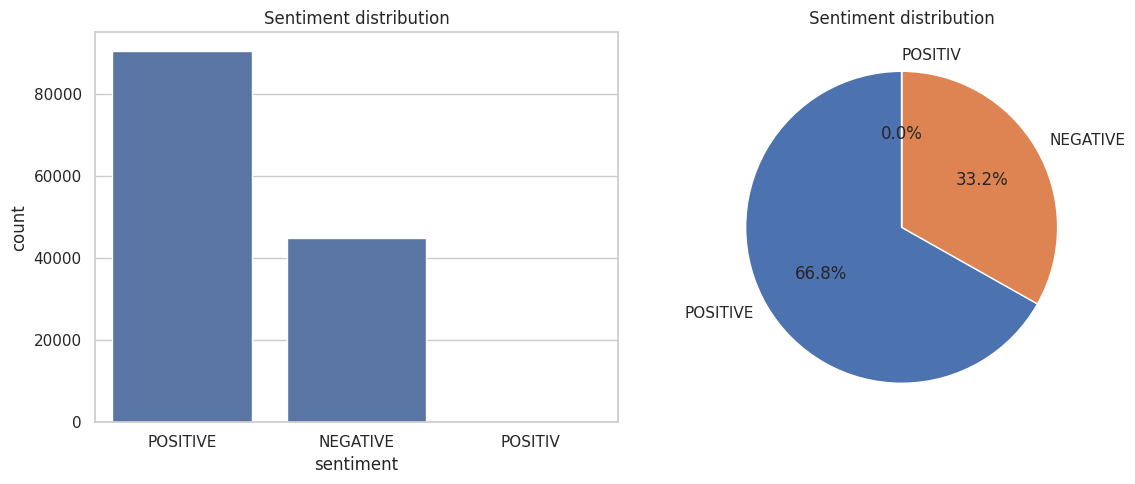

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot count plot
sns.countplot(x='sentiment', data=train_data, ax=axes[0])
axes[0].set_title("Sentiment distribution")

# Plot pie chart
sentiment_counts = train_data['sentiment'].value_counts()
axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Sentiment distribution")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [ ]:
train_data['audienceScore']=train_data['audienceScore']
train_data['audienceScore'].isnull().sum()

np.int64(11056)

In [ ]:
train_data['audienceScore']=train_data['audienceScore'].fillna(train_data['audienceScore'].mean())
train_data['audienceScore'].isnull().sum()

np.int64(0)

In [ ]:
train_data['runtimeMinutes']=train_data['runtimeMinutes'].fillna(train_data['runtimeMinutes'].mean())
train_data['runtimeMinutes'].isnull().sum()

np.int64(0)

In [ ]:
# # reshape it into 2D array
# #Scikit-learn's models and transformers typically expect input data to be in the form
# #of a 2D array or matrix.
audience_Score = train_data['audienceScore'].values.reshape(-1, 1)
runtime_Minutes = train_data['runtimeMinutes'].values.reshape(-1, 1)

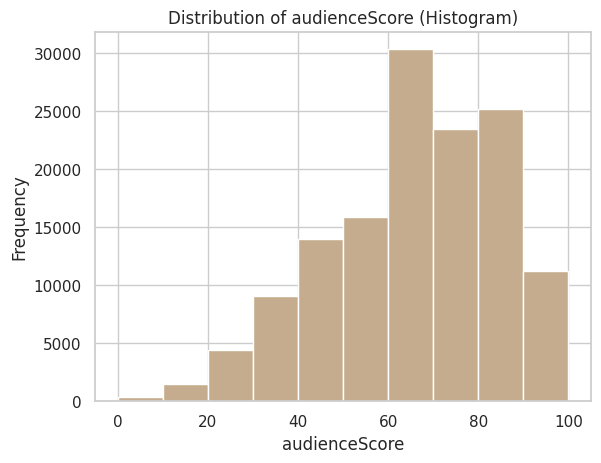

In [ ]:
import matplotlib.pyplot as plt

#Histogram
plt.hist(train_data['audienceScore'], color='#c6ac8f')
plt.title('Distribution of audienceScore (Histogram)')
plt.xlabel('audienceScore')
plt.ylabel('Frequency')
plt.show()

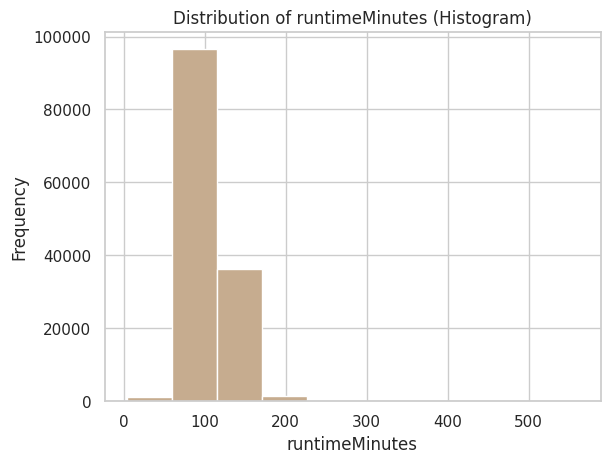

In [ ]:
#Histogram
plt.hist(train_data['runtimeMinutes'], color='#c6ac8f')
plt.title('Distribution of runtimeMinutes (Histogram)')
plt.xlabel('runtimeMinutes')
plt.ylabel('Frequency')
plt.show()

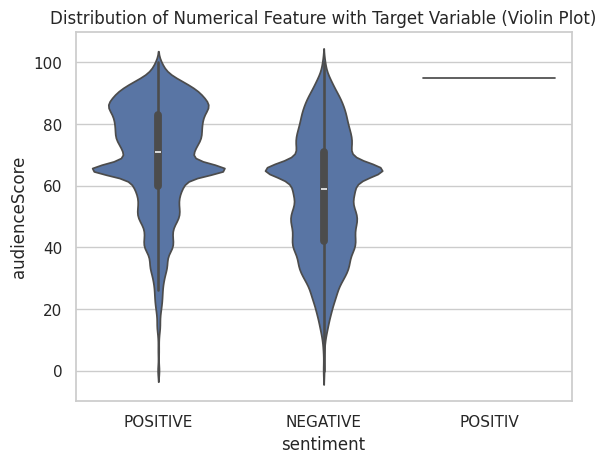

In [ ]:
import seaborn as sns

#violonPlot
sns.violinplot(x='sentiment', y='audienceScore', data=train_data)
plt.title('Distribution of Numerical Feature with Target Variable (Violin Plot)')
plt.show()

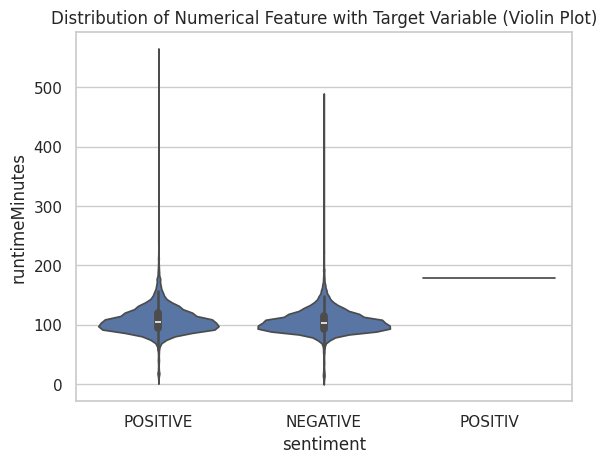

In [ ]:
#violonPlot
sns.violinplot(x='sentiment', y='runtimeMinutes', data=train_data)
plt.title('Distribution of Numerical Feature with Target Variable (Violin Plot)')
plt.show()

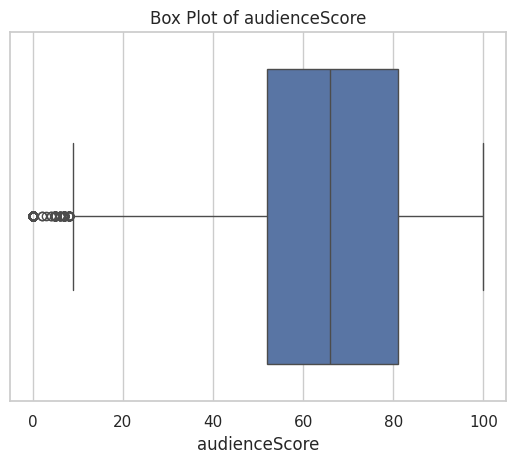

In [ ]:
import seaborn as sns

sns.boxplot(x=train_data['audienceScore'])
plt.title('Box Plot of audienceScore')
plt.xlabel('audienceScore')
plt.show()

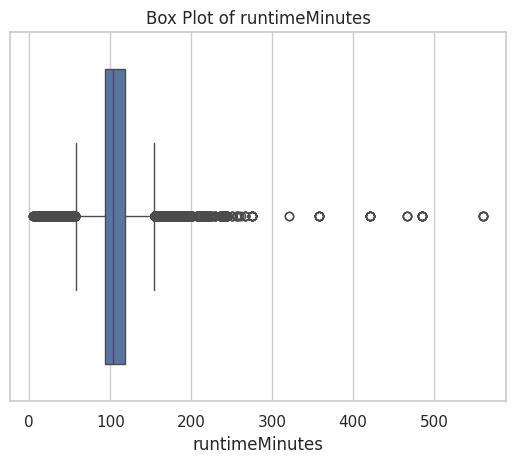

In [ ]:
sns.boxplot(x=train_data['runtimeMinutes'])
plt.title('Box Plot of runtimeMinutes')
plt.xlabel('runtimeMinutes')
plt.show()

**Feature scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform your feature matrix
audience_Score_scaled = scaler.fit_transform(audience_Score)
audience_Score_scaled

array([[0.65      ],
       [0.65184443],
       [0.8       ],
       ...,
       [0.7       ],
       [0.77      ],
       [0.95      ]])

In [ ]:
runtime_Minutes_scaled = scaler.fit_transform(runtime_Minutes)
runtime_Minutes_scaled

array([[0.18132855],
       [0.1561939 ],
       [0.22621185],
       ...,
       [0.16157989],
       [0.18132855],
       [0.31238779]])

**Handling categorical values**

In [ ]:
cat_col=['rating', 'sentiment']
cat_data=train_data[cat_col]
cat_data.isnull().sum()

,0
rating,53036
sentiment,0


In [ ]:
cat_data = cat_data.copy()
cat_data['rating'].fillna('Unknown', inplace=True)
cat_data.isnull().sum()

<ipython-input-39-1471877976>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_data['rating'].fillna('Unknown', inplace=True)


,0
rating,0
sentiment,0


**Visualizing categorical features**

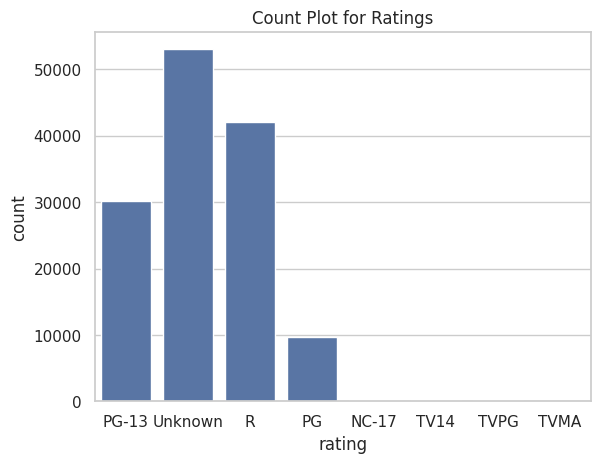

In [ ]:
sns.countplot(x='rating', data=cat_data)
plt.title('Count Plot for Ratings')
plt.show()

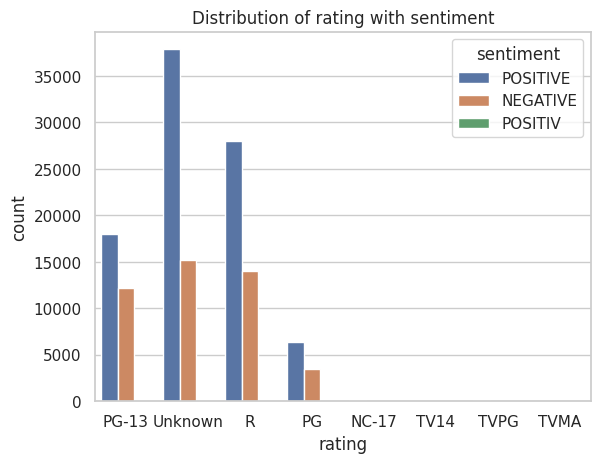

In [ ]:
sns.countplot(x='rating', hue='sentiment', data=cat_data)
plt.title(f'Distribution of rating with sentiment')
plt.show()

**Encoding categorical features**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'processed_data' is your DataFrame
encoder = OneHotEncoder(handle_unknown='ignore')

# Extract the 'rating' column for one-hot encoding
ratings_column = cat_data[['rating']]

# Apply one-hot encoding
rating_encoded = encoder.fit_transform(ratings_column)
rating_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 135447 stored elements and shape (135447, 8)>

**Text data preprocessing**

In [ ]:
train_data['reviewText'].isnull().sum()

np.int64(5361)

In [ ]:
train_data['reviewText']=train_data['reviewText'].fillna('')
train_data['reviewText'].isnull().sum()

np.int64(0)

# Data Cleaning:

In [ ]:
#lowercasing
def lower_case(reviewText):
    #check if the text is string and then convert to lower case
    if isinstance(reviewText, str):
        return reviewText.lower()
    else:
        return reviewText

train_data['reviewText'] = train_data['reviewText'].apply(lower_case)
train_data['reviewText']

,reviewText
0,henry selick’s first movie since 2009’s corali...
1,with a cast that reads like the vogue oscar pa...
2,creed ii does not give us anything but another...
3,"i know what you're thinking, but this is no li..."
4,director fernando meirelles tells the story wi...
...,...
135442,everyone has a canonical classic which they ju...
135443,"overall, an entertaining yarn that, for the mo..."
135444,a slow burn of a movie&#44; one that doesn&#82...
135445,whether you're a newcomer to the planet of the...


In [ ]:
#Remove punctuation and speical characters
import string

def remove_punctuation(reviewText):
    return reviewText.translate(str.maketrans('', '', string.punctuation))

train_data['reviewText'] = train_data['reviewText'].apply(remove_punctuation)
train_data['reviewText']

,reviewText
0,henry selick’s first movie since 2009’s corali...
1,with a cast that reads like the vogue oscar pa...
2,creed ii does not give us anything but another...
3,i know what youre thinking but this is no limi...
4,director fernando meirelles tells the story wi...
...,...
135442,everyone has a canonical classic which they ju...
135443,overall an entertaining yarn that for the most...
135444,a slow burn of a movie44 one that doesn8217t e...
135445,whether youre a newcomer to the planet of the ...


In [ ]:
import re

def remove_urls(reviewText):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')

    # Use the sub() method to replace URLs with an empty string
    return url_pattern.sub('', reviewText)

train_data['reviewText'] = train_data['reviewText'].apply(remove_urls)


In [ ]:
def remove_whitespace(reviewText):
    # Use replace to remove white spaces
    return reviewText.strip('')

train_data['reviewText'] = train_data['reviewText'].apply(remove_whitespace)
train_data['reviewText']

,reviewText
0,henry selick’s first movie since 2009’s corali...
1,with a cast that reads like the vogue oscar pa...
2,creed ii does not give us anything but another...
3,i know what youre thinking but this is no limi...
4,director fernando meirelles tells the story wi...
...,...
135442,everyone has a canonical classic which they ju...
135443,overall an entertaining yarn that for the most...
135444,a slow burn of a movie44 one that doesn8217t e...
135445,whether youre a newcomer to the planet of the ...


In [ ]:
import re

def remove_numbers(reviewText):
    if isinstance(reviewText, str):
        return re.sub(r'\d+', '', reviewText)
    else:
        return reviewText

train_data['reviewText'] = train_data['reviewText'].apply(remove_numbers)

In [ ]:
#Tokenization
def tokenize_text(reviewText):
    # Split the review text into words based on whitespace
    words = reviewText.split()
    return words

train_data['reviewText'] = train_data['reviewText'].apply(tokenize_text)

In [ ]:
#Handling negative words
def handle_negations(tokens):
    # List of negation words
    negation_words = ['not', 'no', 'never', 'none', 'nobody', 'nowhere']

    # Iterate through tokens and negate the sentiment of the next word after a negation
    negated_tokens = []
    negate = False
    for token in tokens:
        if token.lower() in negation_words:
            negate = True
        elif negate:
            negated_tokens.append('not_' + token)
            negate = False  # Reset negate flag after negating the next word
        else:
            negated_tokens.append(token)

    return negated_tokens

train_data['reviewText'] = train_data['reviewText'].apply(handle_negations)
train_data['reviewText']

,reviewText
0,"[henry, selick’s, first, movie, since, ’s, cor..."
1,"[with, a, cast, that, reads, like, the, vogue,..."
2,"[creed, ii, does, not_give, us, anything, but,..."
3,"[i, know, what, youre, thinking, but, this, is..."
4,"[director, fernando, meirelles, tells, the, st..."
...,...
135442,"[everyone, has, a, canonical, classic, which, ..."
135443,"[overall, an, entertaining, yarn, that, for, t..."
135444,"[a, slow, burn, of, a, movie, one, that, doesn..."
135445,"[whether, youre, a, newcomer, to, the, planet,..."


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and short words
def remove_stop_words(words):
    return [word for word in words if word.lower() not in stop_words and len(word) >= 3]

# Apply the function
train_data['reviewText'] = train_data['reviewText'].apply(remove_stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import string
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def process_text(text):
    if isinstance(text, str):
        #lowercasing
        text = text.lower()
        #removing special characters and punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        #remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        #remove numerical values
        text = re.sub(r'\d+', '', text)
        #tokenization
        text = re.findall(r'\b\w+\b', text)
        #negation handling
        text = ['not_' + word if text[i - 1] == 'not' else word for i, word in enumerate(text)]
        #remove stop words
        text = [word for word in text if word not in ENGLISH_STOP_WORDS]
        return text
    else:
        return []

preprocessor = Pipeline([
    ('text_processing', FunctionTransformer(lambda x: x.apply(process_text)))
])

train_data['reviewText'] = preprocessor.fit_transform(train_data['reviewText'])
train_data['reviewText']

,reviewText
